In [1]:
import numpy as np
import pandas as pd
import tensorflow as tf
import tensorflow_recommenders as tfrs
import tensorflow_datasets as tfds
import matplotlib.pyplot as plt
import seaborn as sns
from zipfile import ZipFile
from sklearn.model_selection import train_test_split
from tensorflow.keras.layers import Embedding
from tensorflow.keras.utils import get_file
from sklearn.metrics import precision_score, recall_score, accuracy_score

In [2]:
# --- Load Dataset ---
cols = ['userId', 'movieId', 'rating', 'timestamp']
movies = tfds.load("movielens/100k-movies", split="train")
movies_df = tfds.as_dataframe(movies)

In [14]:
ratings_df = tfds.as_dataframe(ratings)
movies_df = tfds.as_dataframe(movies)


In [16]:
print(f"Ratings shape: {ratings_df.shape}")
print(f"Movies shape: {movies_df.shape}")

Ratings shape: (100000, 12)
Movies shape: (1682, 3)


In [18]:
ratings_df.head()

,bucketized_user_age,movie_genres,movie_id,movie_title,raw_user_age,timestamp,user_gender,user_id,user_occupation_label,user_occupation_text,user_rating,user_zip_code
0,45.0,[7],b'357',"b""One Flew Over the Cuckoo's Nest (1975)""",46.0,879024327,True,b'138',4,b'doctor',4.0,b'53211'
1,25.0,"[4, 14]",b'709',b'Strictly Ballroom (1992)',32.0,875654590,True,b'92',5,b'entertainment',2.0,b'80525'
2,18.0,[4],b'412',"b'Very Brady Sequel, A (1996)'",24.0,882075110,True,b'301',17,b'student',4.0,b'55439'
3,50.0,"[5, 7]",b'56',b'Pulp Fiction (1994)',50.0,883326919,True,b'60',4,b'healthcare',4.0,b'06472'
4,50.0,"[10, 16]",b'895',b'Scream 2 (1997)',55.0,891409199,True,b'197',18,b'technician',3.0,b'75094'


In [19]:
movies_df.head()

,movie_genres,movie_id,movie_title
0,[4],b'1681',b'You So Crazy (1994)'
1,"[4, 7]",b'1457',b'Love Is All There Is (1996)'
2,"[1, 3]",b'500',b'Fly Away Home (1996)'
3,[0],b'838',b'In the Line of Duty 2 (1987)'
4,[7],b'1648',"b'Niagara, Niagara (1997)'"


In [20]:
stats_df = pd.DataFrame({
    'Metric': [
        'Total Ratings',
        'Unique Users', 
        'Unique Movies',
        'Average Rating',
        'Rating Range',
        'Sparsity'
    ],
    'Value': [
        f"{len(ratings_df):,}",
        f"{ratings_df['user_id'].nunique():,}",
        f"{ratings_df['movie_id'].nunique():,}",
        f"{ratings_df['user_rating'].mean():.2f}",
        f"{ratings_df['user_rating'].min():.0f} - {ratings_df['user_rating'].max():.0f}",
        f"{(1 - len(ratings_df) / (ratings_df['user_id'].nunique() * ratings_df['movie_id'].nunique())) * 100:.2f}%"
    ]
})
print(stats_df.to_string(index=False))

        Metric   Value
 Total Ratings 100,000
  Unique Users     943
 Unique Movies   1,682
Average Rating    3.53
  Rating Range   1 - 5
      Sparsity  93.70%


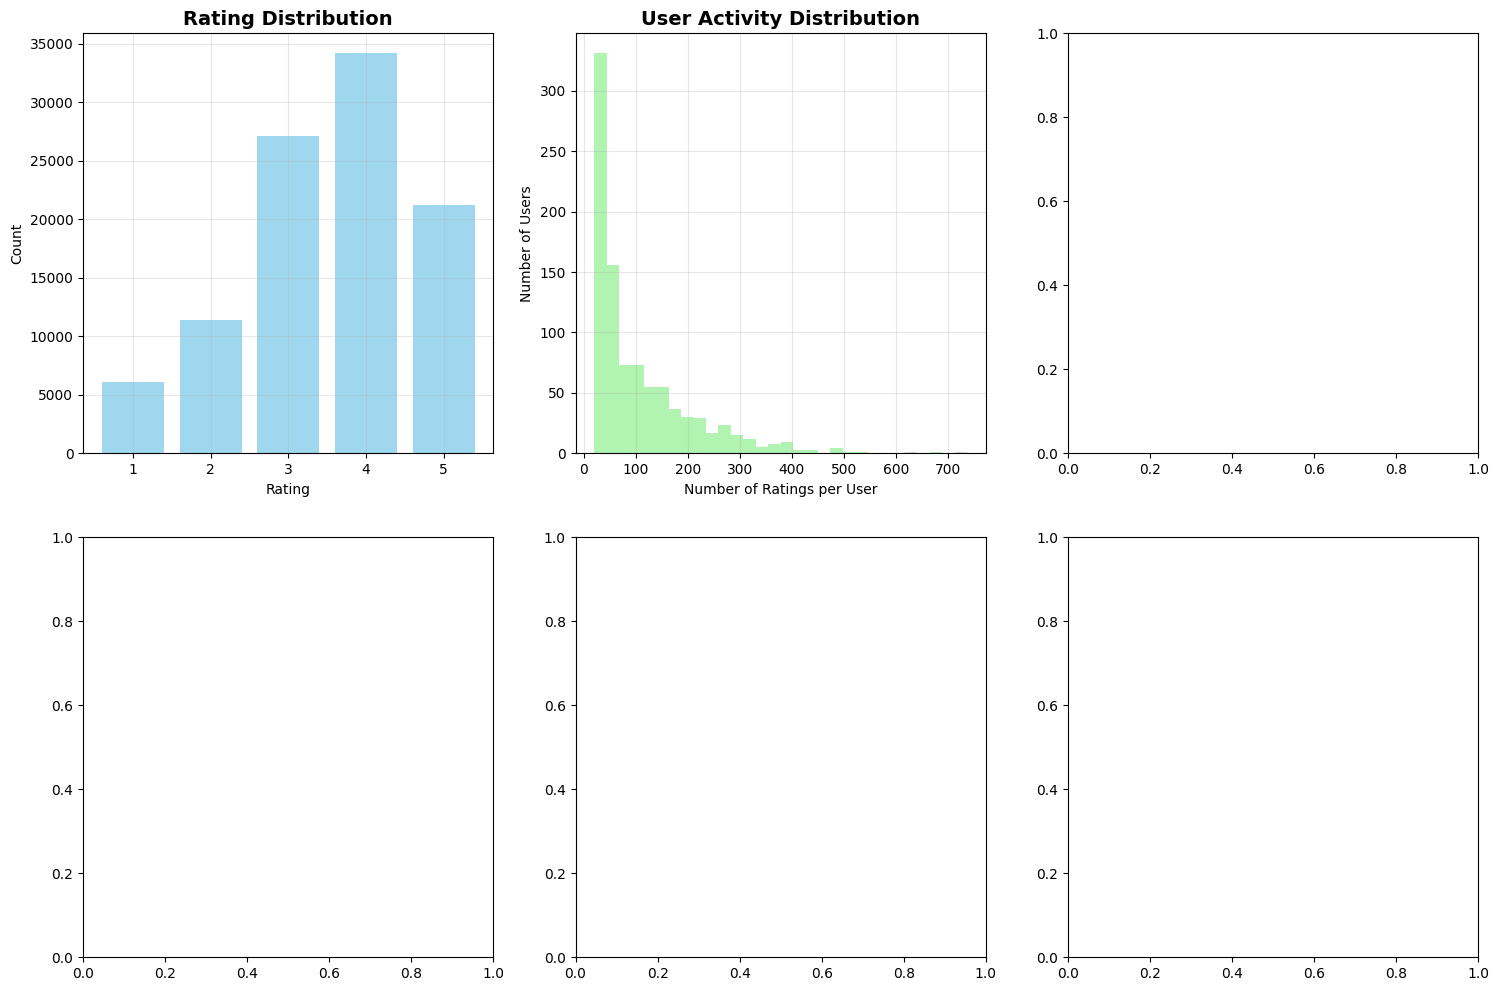